In [1]:
# We will need a factorial and binomial coefficient function for some of the computations today

def factorial(n):
    
    if n < 1:
        return 1
    else:
        return n*factorial(n-1)
    
def binom(m, n):
    
    return factorial(m)/( factorial(m-n)*factorial(n))

# Discrete Random Variables

We start with discrete random variables. First some definitions:

1. What is our definition of a *discrete random variable*?

Discrete Variables:  Takes on countable values; integers; infinitely many, but countably many. Values do not become arbitrarily close, there is a distance between them.

Continuous Variables:  set of all reals? Infinitely many reals but they are arbitrarily close to each other. Rationals will be the same arbitrarily close to each other.  


2. Can a discrete random variable take on infinitely many values? Is there anything that makes us nervous?

Yes. For example let Y be a random integer with each integer equally likely.  

Let P(y) be the probability that the discrete random variable y is selected. 

What do we need to get if we add up all of the P(y)s for every value y that the discrete random variable could take:  1. 

The concern with a discrete random variable that could take infinitely many values, is that the total probablity needs to add up to 1.


3. Give four examples of a **real** (as in real world not real number) discrete random variable:

a. One of which we know the probability distribution of. <br/>

- Energy levels of a hydrogen atom, we know the likliehood of any given energy level. 
- Coin flips:  Let Y be H or T after flipping a fair coin. P(H) = 1/2; P(T) = 1 - P(H) = 1/2. 

b. One of which takes on infinitely many values. <br/>

- How many minutes will it be till there is a car accident at the corner of 35st and US34.
- The sum of the score of the super bowl.

c. One of which is uniform?  (what do we mean by uniform?) <br/>

*uniform distributions:* Each outcome is equally likely.

- Rolling a (fair) six sided die and letting Y be the number on top.


d. One of which your team finds interesting. <br/>

4. What is our definition of the *Probability Distribution* of a discrete random variable?

P(Y) = the probability that the value Y results from the experiment.


5. Consider the following discrete random variable:  we roll a fair six-sided die, Y is the number facing up. What is the expected value of Y?

Expected value is defined to be the weighted average or mean of a numerical random variable. 



In [2]:
1*1/6 + 2*1/6 + 3*1/6 + 4*1/6 + 5*1/6 + 6*1/6

3.5

In [3]:
(1+2+3+4+5+6)/6

3.5

$$ E(y) = \sum y P(y) $$

Provided that the sum converges.

6. Suppose we take the number facing up, Y, and we square it. What is the expected value of $Y^2$?

In [4]:
1**2 *1/6 + 2**2 *1/6 + 3**2 *1/6 + 4**2 * 1/6 + 5**2 * 1/6 + 6**2 * 1/6

15.166666666666668

$$ E( f(y) ) = \sum f(y) P(y) $$

Provided that the sum converges.

7. A company in Greeley makes plastic face shields. 1.2% of the time the face shield has a serious flaw and needs to be discarded. Suppose we select 200 face shields at random and let Y be the number with a serious flaw.  What is the expected value of Y?

P(Y) = The probability that out of 200 face shields, Y of them have a serious flaw

Start with:  All 200 are fine
$$ P(Y=0) = (1 - 0.012)^200$$

Now how about 1 of them has a serious flaw:

$$ P(Y=1) = \begin{pmatrix} 200 \\ 1 \end{pmatrix} 0.012^1 (1-0.012)^{199} $$

more generally:

$$ P(Y=y) = \begin{pmatrix} 200 \\ y \end{pmatrix} 0.012^y (1-0.012)^{200 - y} $$

In [5]:
# I'll do this one here as it illustrates some tricks with Python we will need

P = {}
# It is convenient to build the PDF as a Dictionary so that P[y] is the probability P(Y=y)

for y in range(200+1):
    P[y] = binom(200, y)*0.012**y * (1-0.012)**(200-y) 
# This is an example of a binomial probability distrubtion where the probability of a single successful trial is p.
    
    
sum([ P[y] for y in P]), sum([ y*P[y] for y in P])
# expected value is then computed by suming over all the values, which Python makes easy using a list generator

(0.9999999999999978, 2.3999999999999946)

In [4]:
# not surprisingly this is:  
0.012 * 200

2.4

In fact:  $$ E(y) = n p $$ for a binomial random variable.

8. The expected value gives us the 'center' of the random variable (or a function of it). In addition to knowing the center, we are also interested in how far the result tends to be spread from the center.

Let $\mu = E(Y)$, then we define the *variance* by $ V(Y) = \sigma^2 = E[ (Y-\mu)^2 ] $.  

Note why this makes sense, it captures how far Y moves from its expected value.

Why do we take the square?

9. Find the variance of Y from the six sided die.

In [6]:
mu = 3.5

sum( [ (y-mu)**2*1/6 for y in range(1, 6+1) ]) 

2.916666666666667

10. Find the variance of Y^2 from the six sided die.

In [7]:
mu = sum( [ y**2 * 1/6 for y in range(1, 7) ])

mu, sum( [ (y**2 - mu)**2 *1/6 for y in range(1, 7) ])

(15.166666666666668, 149.13888888888889)

11. Find the variance of Y from the face shields.

In [9]:
# I'll do this one here again to illustrate some tricks with Python

mu = sum([ y*P[y] for y in P] )
# let's go ahead and let Python take care of fixing the value of mu

mu, sum( [ (y-mu)**2 * P[y] for y in P] )
# compute the expected value of (y-mu)^2 remember that **2 is ^2 in Python.

(2.3999999999999946, 2.3711999999999955)

12. If Y has units, what are the units of $\mu = E(Y)$ and $\sigma^2 = V(Y)$?

Units of the Expected Value are the units of Y,

Units of the Variance are $$ (\mbox{the units of Y})^2$$

In [11]:
import numpy as np
np.sqrt(2.3712)

1.5398701243936126

$$\sigma  = \sqrt{V(Y)} $$ is the standard deviation of the random variable.

In [12]:
2.4 - 1.54, 2.4 + 1.54

(0.8599999999999999, 3.94)

## An Experiement

Are we sure about our computations above?  One of the great things about 2021 is that we can use Python (even on our phones using Google Colab) to check. Essentially, unlike a lot of mathematics classes, we can conduct an experiment in this class to see how close we are.

In [13]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

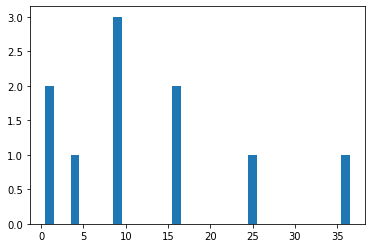

In [31]:
# We use the numpy randint function which returns an array of size pulled from range(1, 7) (excluding 7).
rolls = randint(1, 7, size=10)
sample = [y**2 for y in rolls]

# graph it with a historgram. We have to do the bins by hand because matplotlib.pyplot.hist is built
# for working with more continuous than discrete data
plt.hist(sample, bins=[0.5, 1.5, 3, 3.5, 4.5, 5, 8.5, 9.5, 10, 15.5, 16.5, 17, 24.5, 25.5, 26, 35.5, 36.5]);

In [32]:
# Numpy has mean and variance functions
np.mean(sample), np.var(sample)

(12.6, 110.64000000000001)

In [33]:
mu = sum(sample)/len(sample)
mu, sum([ (s - mu)**2 for s in sample])/len(sample)

(12.6, 110.64000000000001)

How do these compare with your computed values for the population? Later in class we will come back to exactly what we are doing here (sampling a population and comparing the statistics of the sample to the statistics of the population).

In [18]:
(15.166666666666668, 149.13888888888889)

(15.166666666666668, 149.13888888888889)